<a href="https://colab.research.google.com/github/itsbhh/Weather-Prediction/blob/main/Weather_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving seattle-weather.csv to seattle-weather (1).csv
         date  precipitation  temp_max  temp_min  wind  weather
0  2012-01-01            0.0      12.8       5.0   4.7  drizzle
1  2012-01-02           10.9      10.6       2.8   4.5     rain
2  2012-01-03            0.8      11.7       7.2   2.3     rain
3  2012-01-04           20.3      12.2       5.6   4.7     rain
4  2012-01-05            1.3       8.9       2.8   6.1     rain
date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64
Total duplicated rows: 0
training_set length: 1461
Total samples: 1451 1451

===== Training VanillaRNN =====


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


VanillaRNN — Test Metrics
RMSE: 3.0893
MAE: 2.4116
MAPE: 18.28%

===== Training LSTM =====


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


LSTM — Test Metrics
RMSE: 2.9067
MAE: 2.2518
MAPE: 16.70%

===== Training GRU =====


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


GRU — Test Metrics
RMSE: 2.9562
MAE: 2.3270
MAPE: 18.48%

===== Training CNN =====


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


CNN — Test Metrics
RMSE: 3.3293
MAE: 2.6859
MAPE: 21.48%

===== Training GRU-LSTM =====


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


GRU-LSTM — Test Metrics
RMSE: 2.9439
MAE: 2.3203
MAPE: 18.01%

===== Training BiGRU-RNN =====


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


BiGRU-RNN — Test Metrics
RMSE: 2.9722
MAE: 2.3216
MAPE: 17.00%

===== Training BiGRU-LSTM =====


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


BiGRU-LSTM — Test Metrics
RMSE: 2.9315
MAE: 2.3091
MAPE: 17.34%

===== Training CNN-BiGRU =====


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


CNN-BiGRU — Test Metrics
RMSE: 2.8306
MAE: 2.2344
MAPE: 17.14%

=== Leaderboard ===
     Model  Val RMSE  Val MAE  Val MAPE (%)  Test RMSE  Test MAE  Test MAPE (%)
 CNN-BiGRU  3.022269 2.401053     11.547879   2.830650  2.234415      17.143403
      LSTM  3.121010 2.486925     11.896131   2.906665  2.251794      16.703081
       GRU  3.127982 2.471742     11.787850   2.956196  2.327046      18.481006
  GRU-LSTM  3.129154 2.475566     11.891399   2.943903  2.320281      18.006841
BiGRU-LSTM  3.172373 2.509494     12.044414   2.931520  2.309085      17.339099
 BiGRU-RNN  3.173234 2.507921     11.776099   2.972157  2.321572      16.999463
VanillaRNN  3.249167 2.588817     12.344219   3.089306  2.411558      18.283047
       CNN  3.936812 3.112642     14.652594   3.329279  2.685873      21.477396

=== Best Model ===
Best model is: CNN-BiGRU
Validation RMSE: 3.0223, Test RMSE: 2.8306


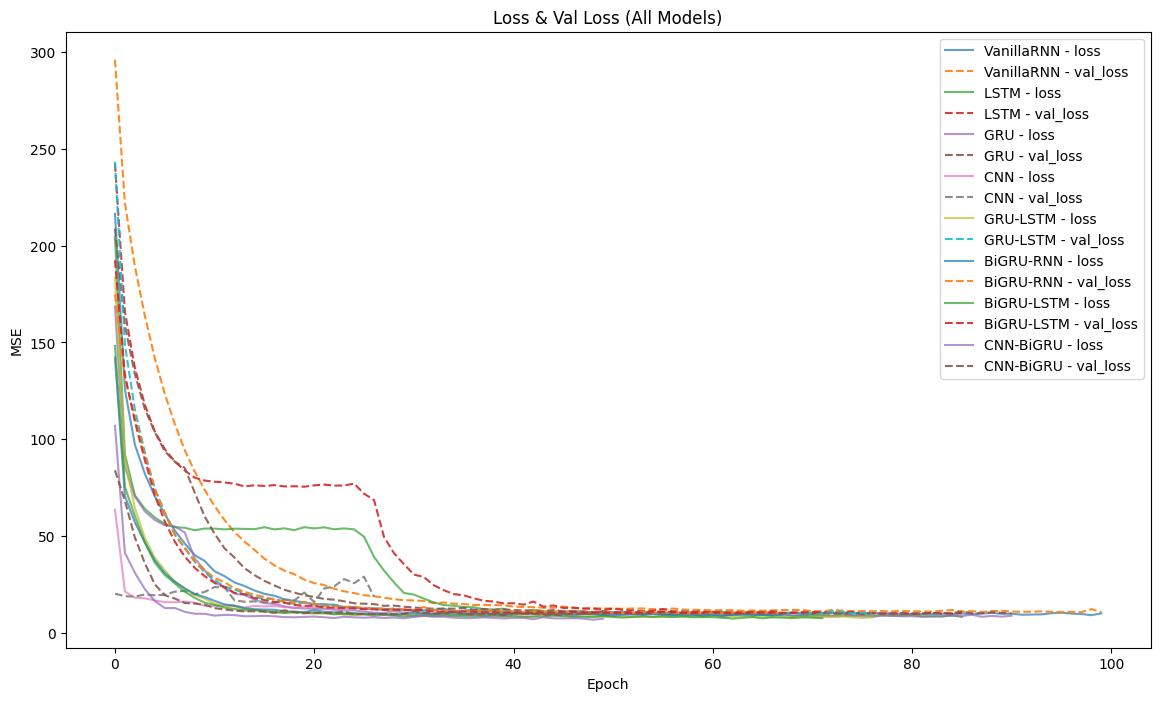

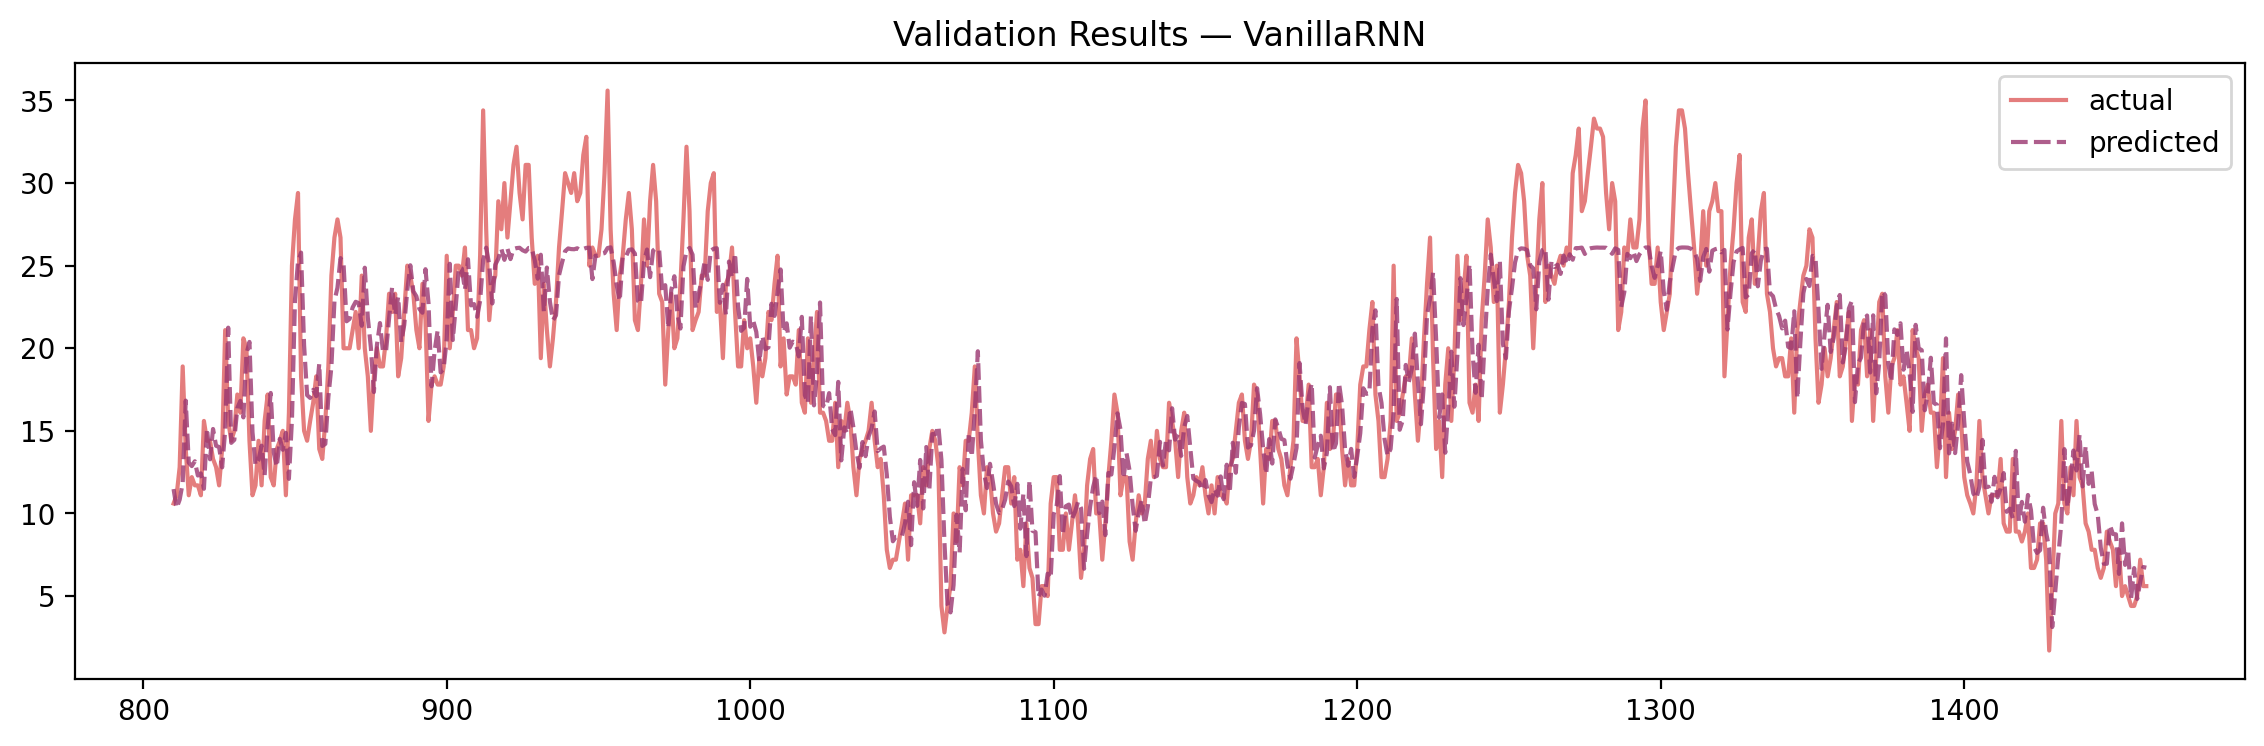

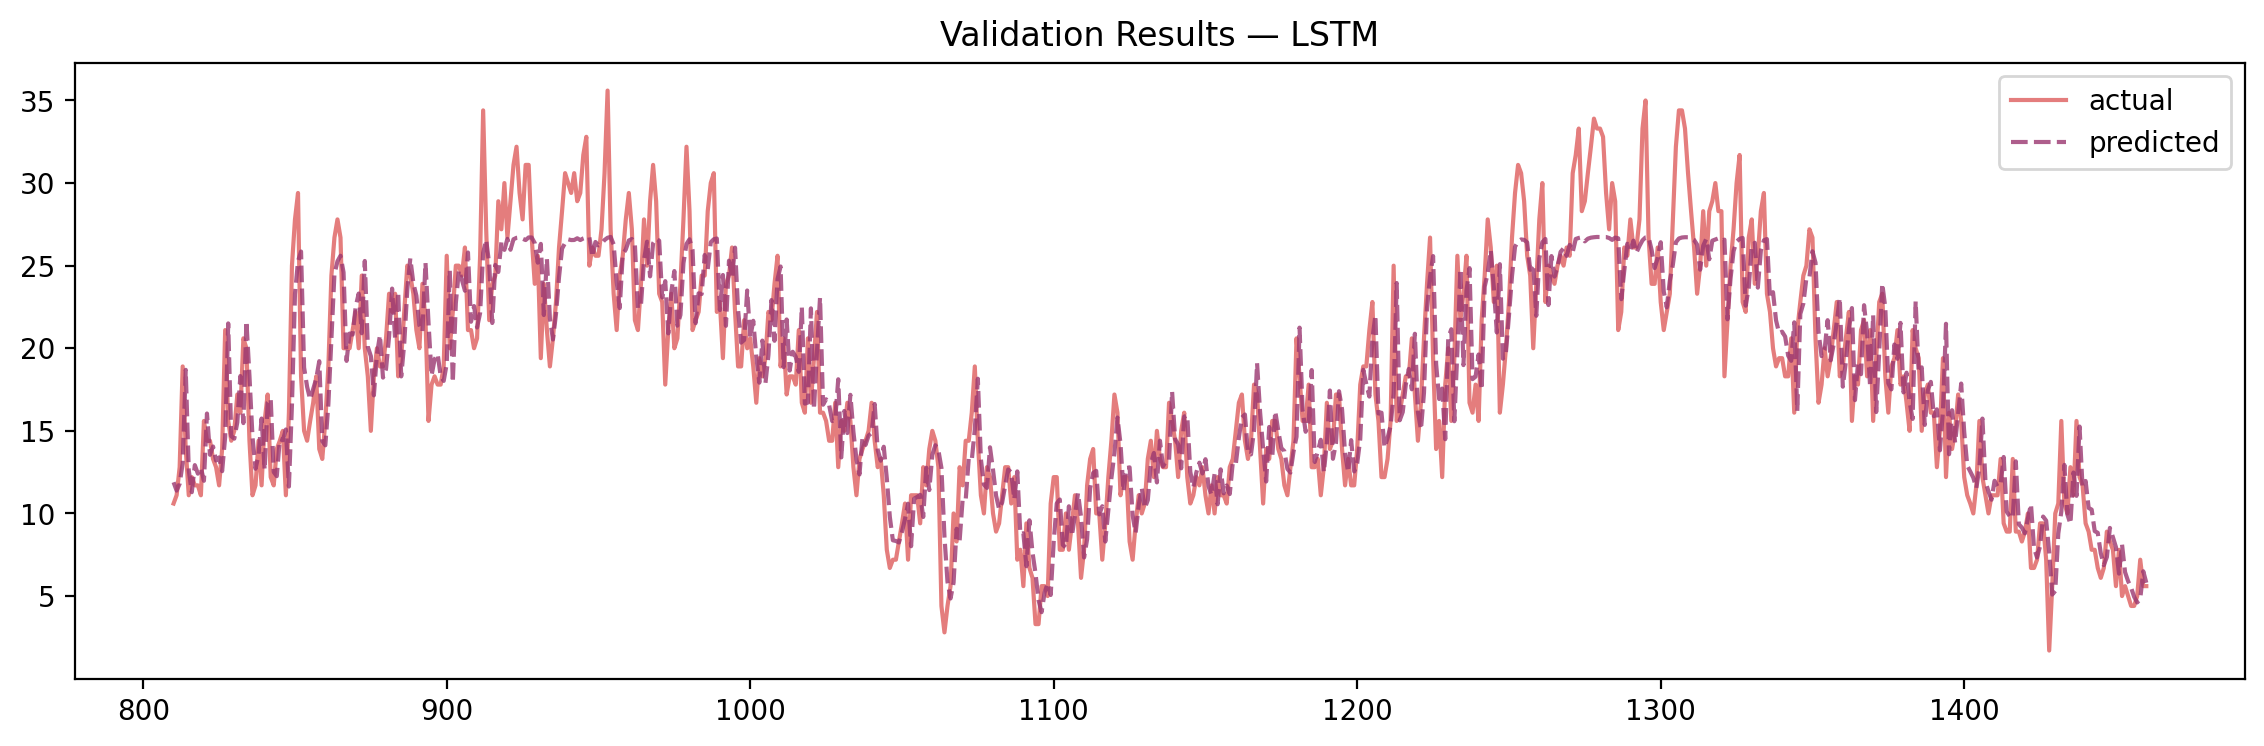

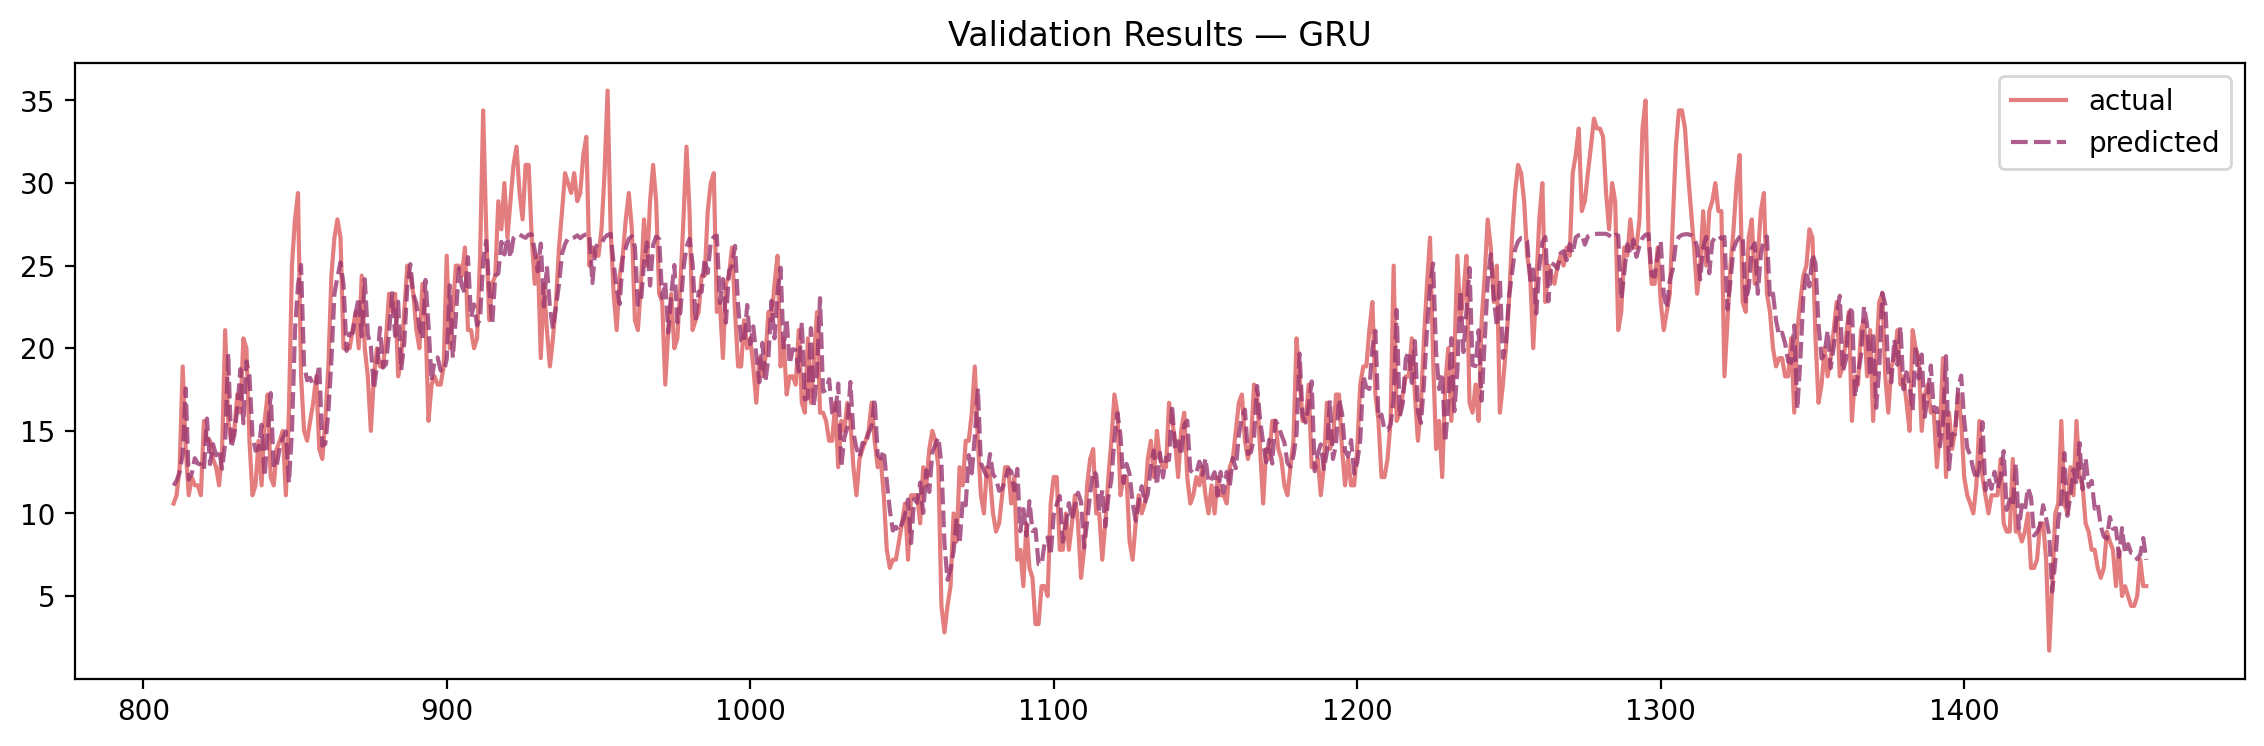

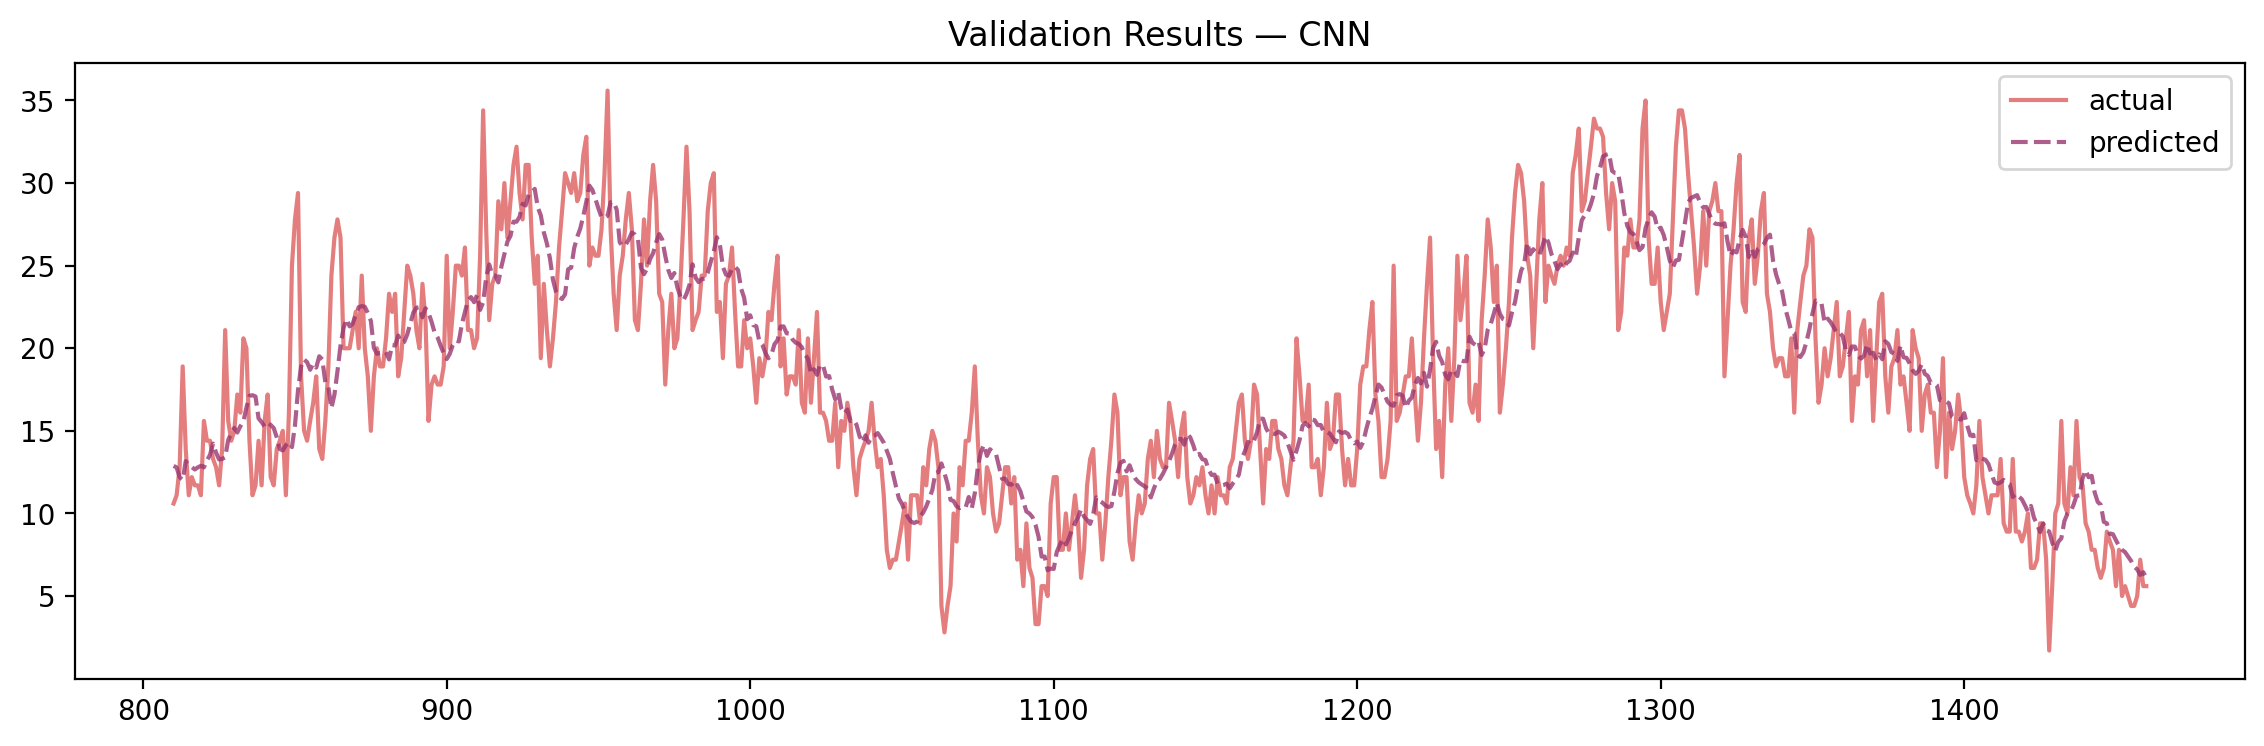

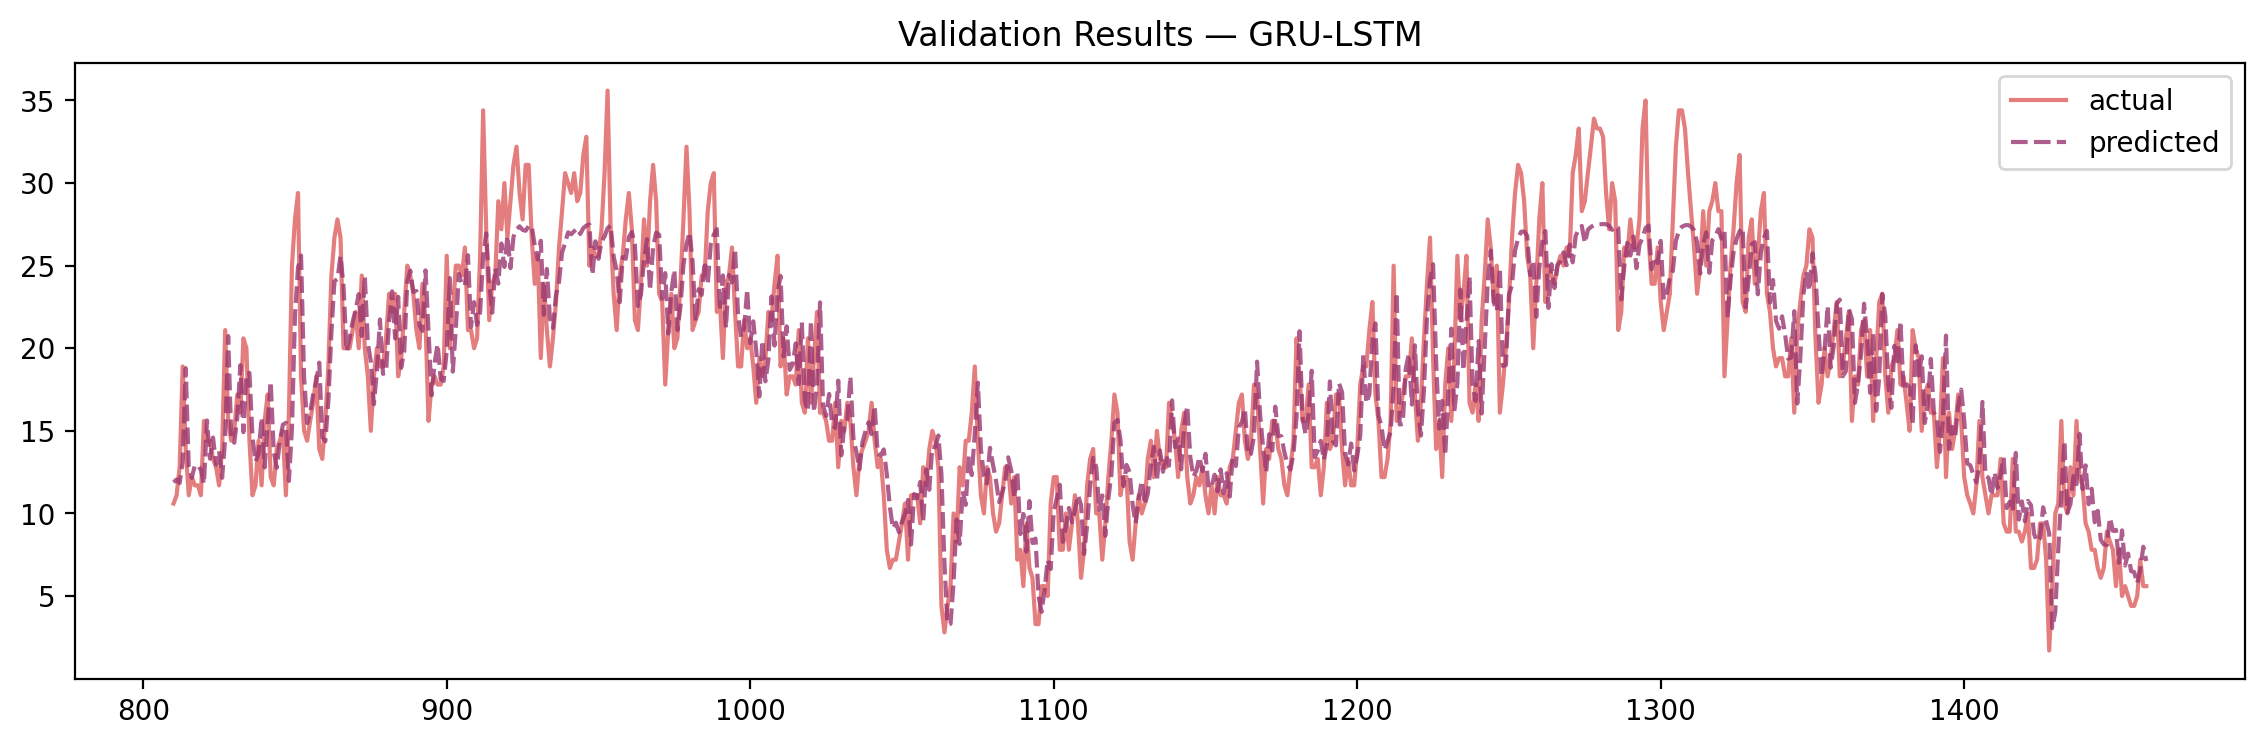

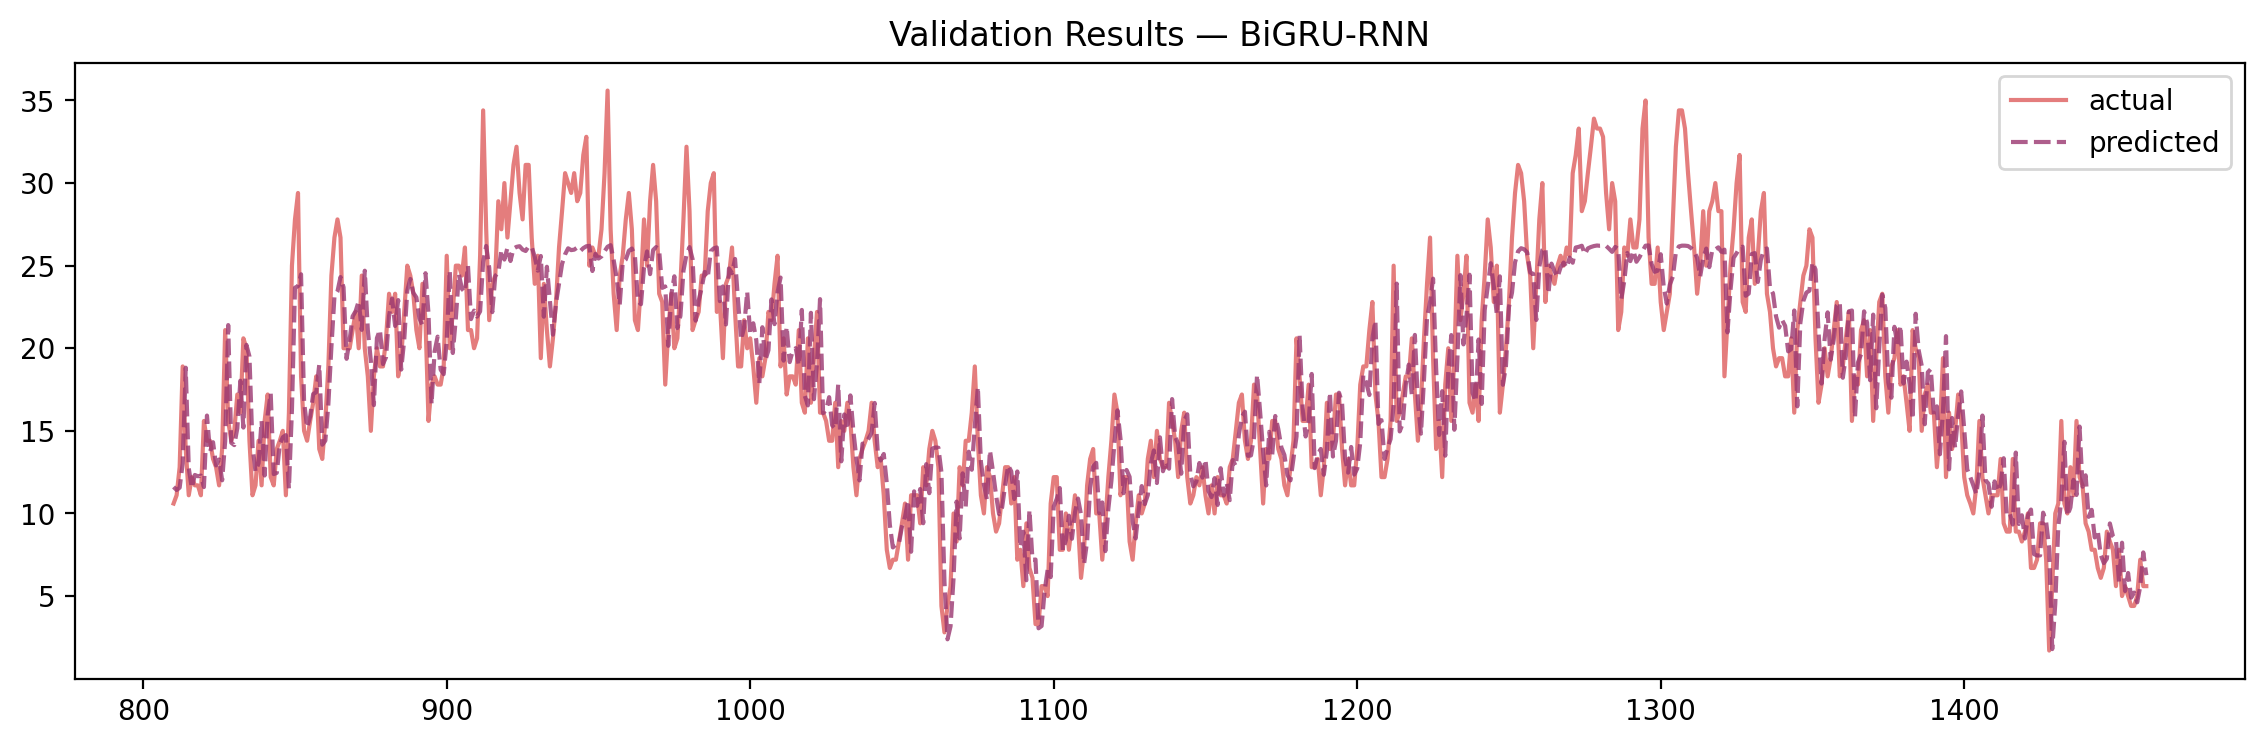

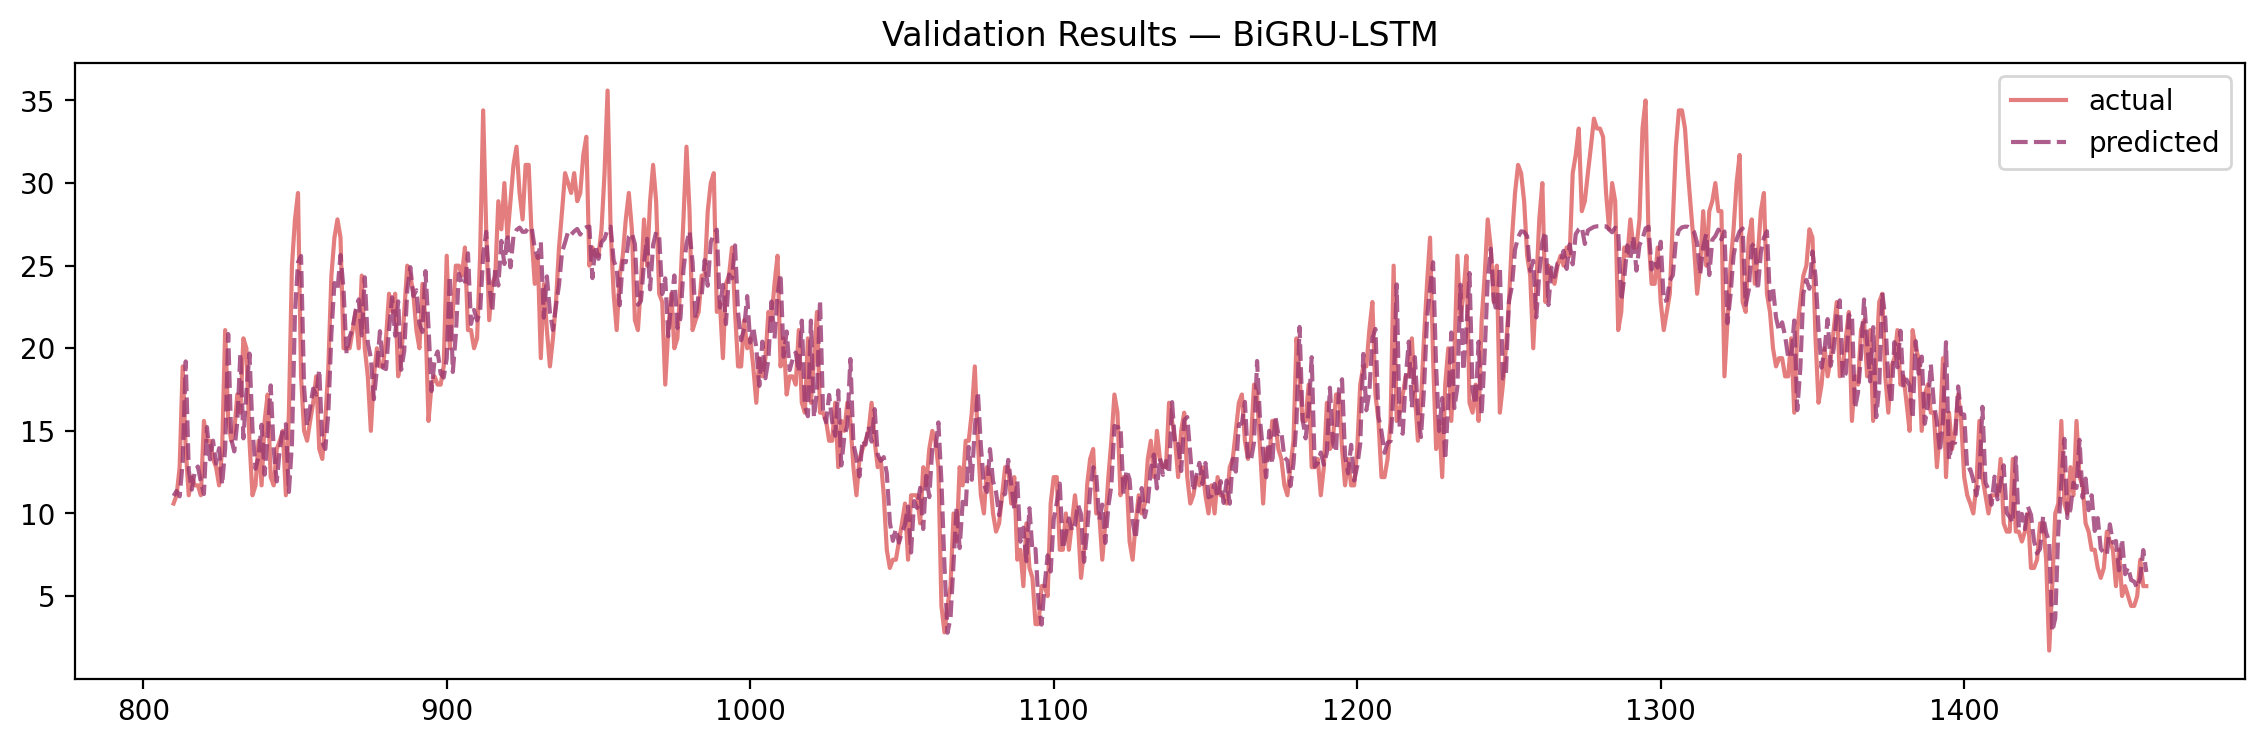

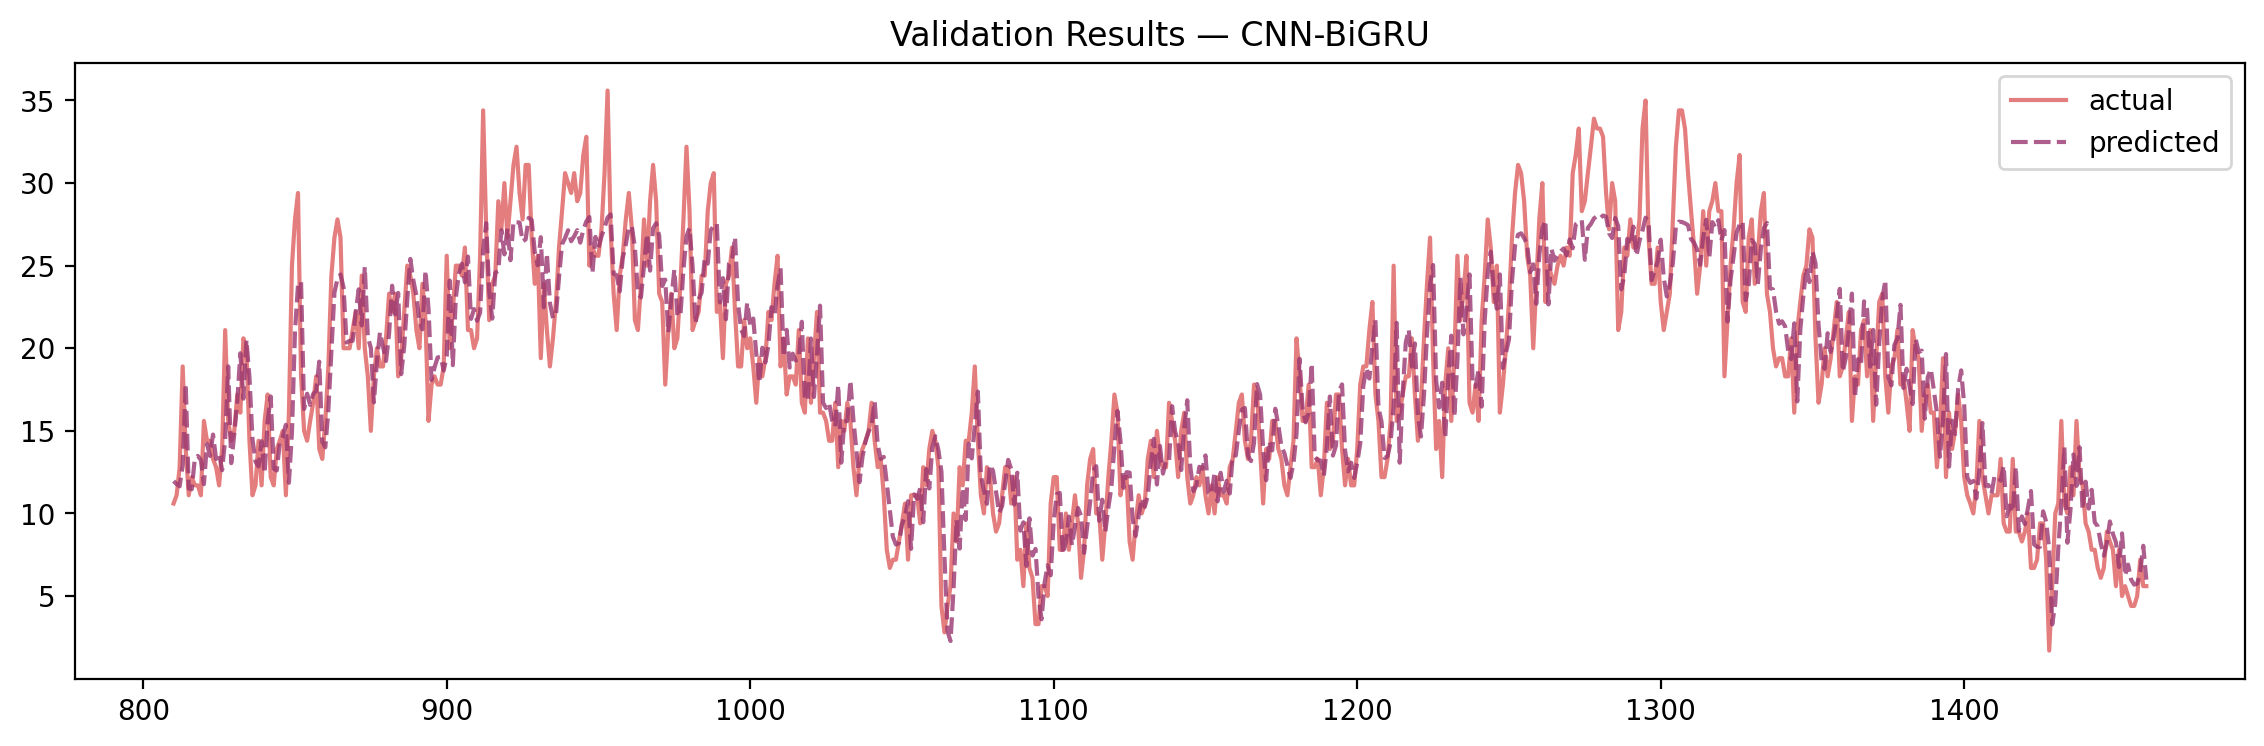

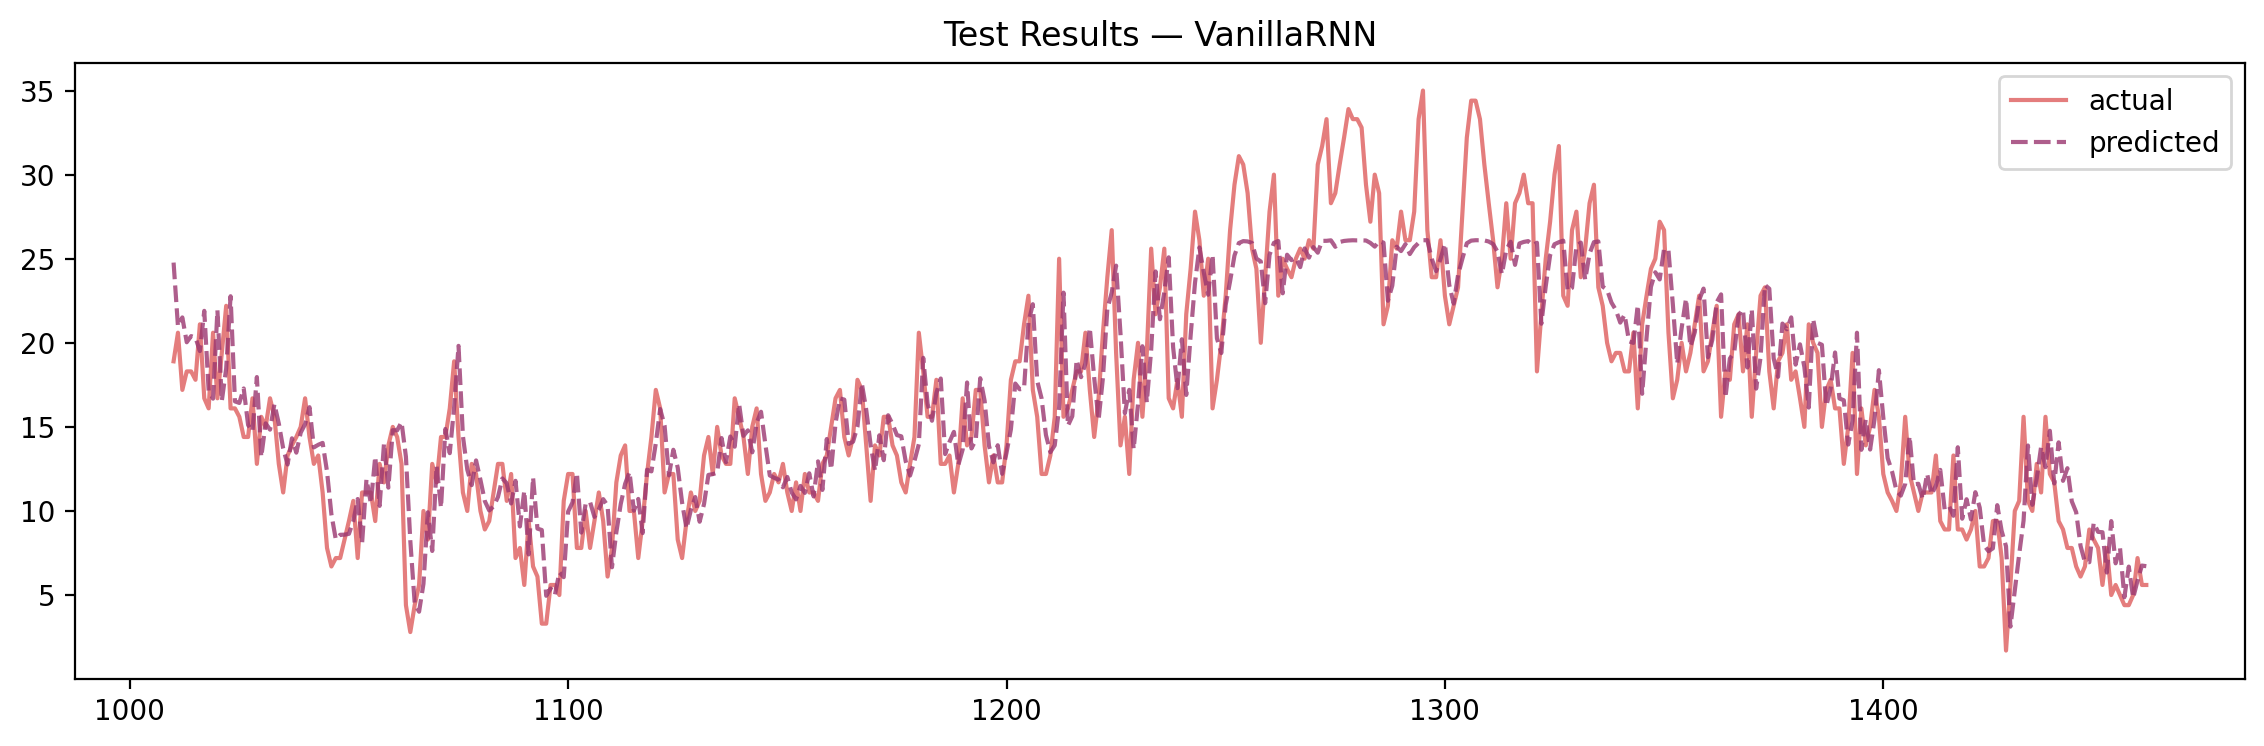

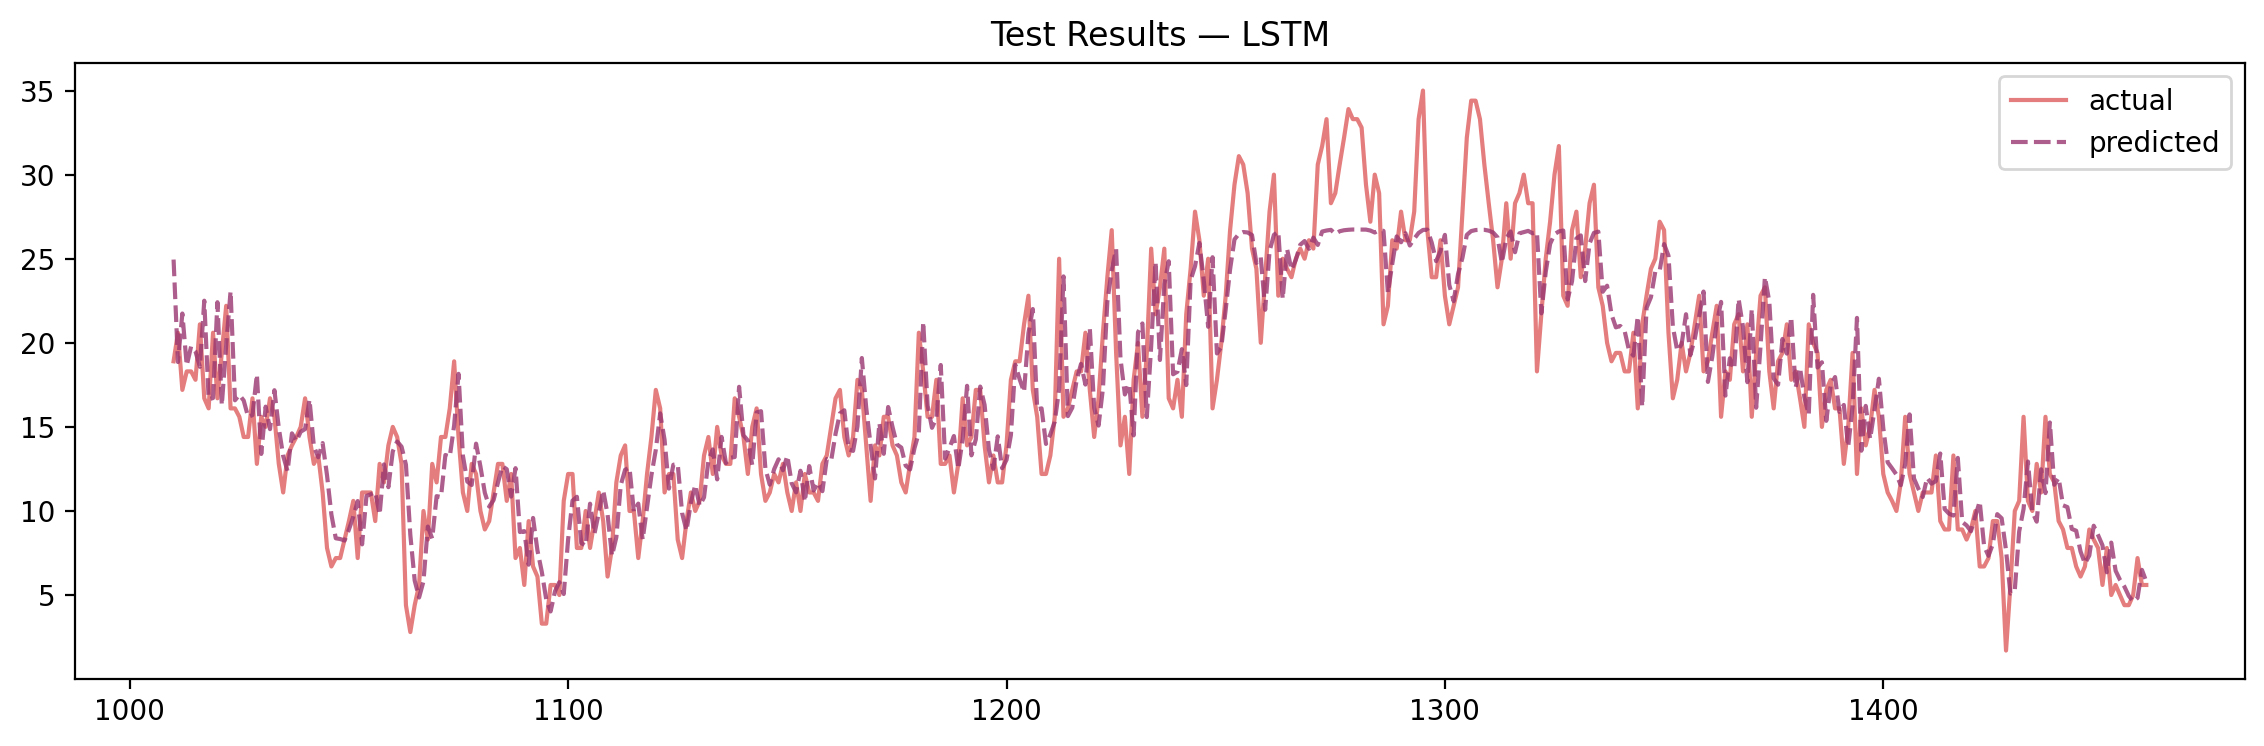

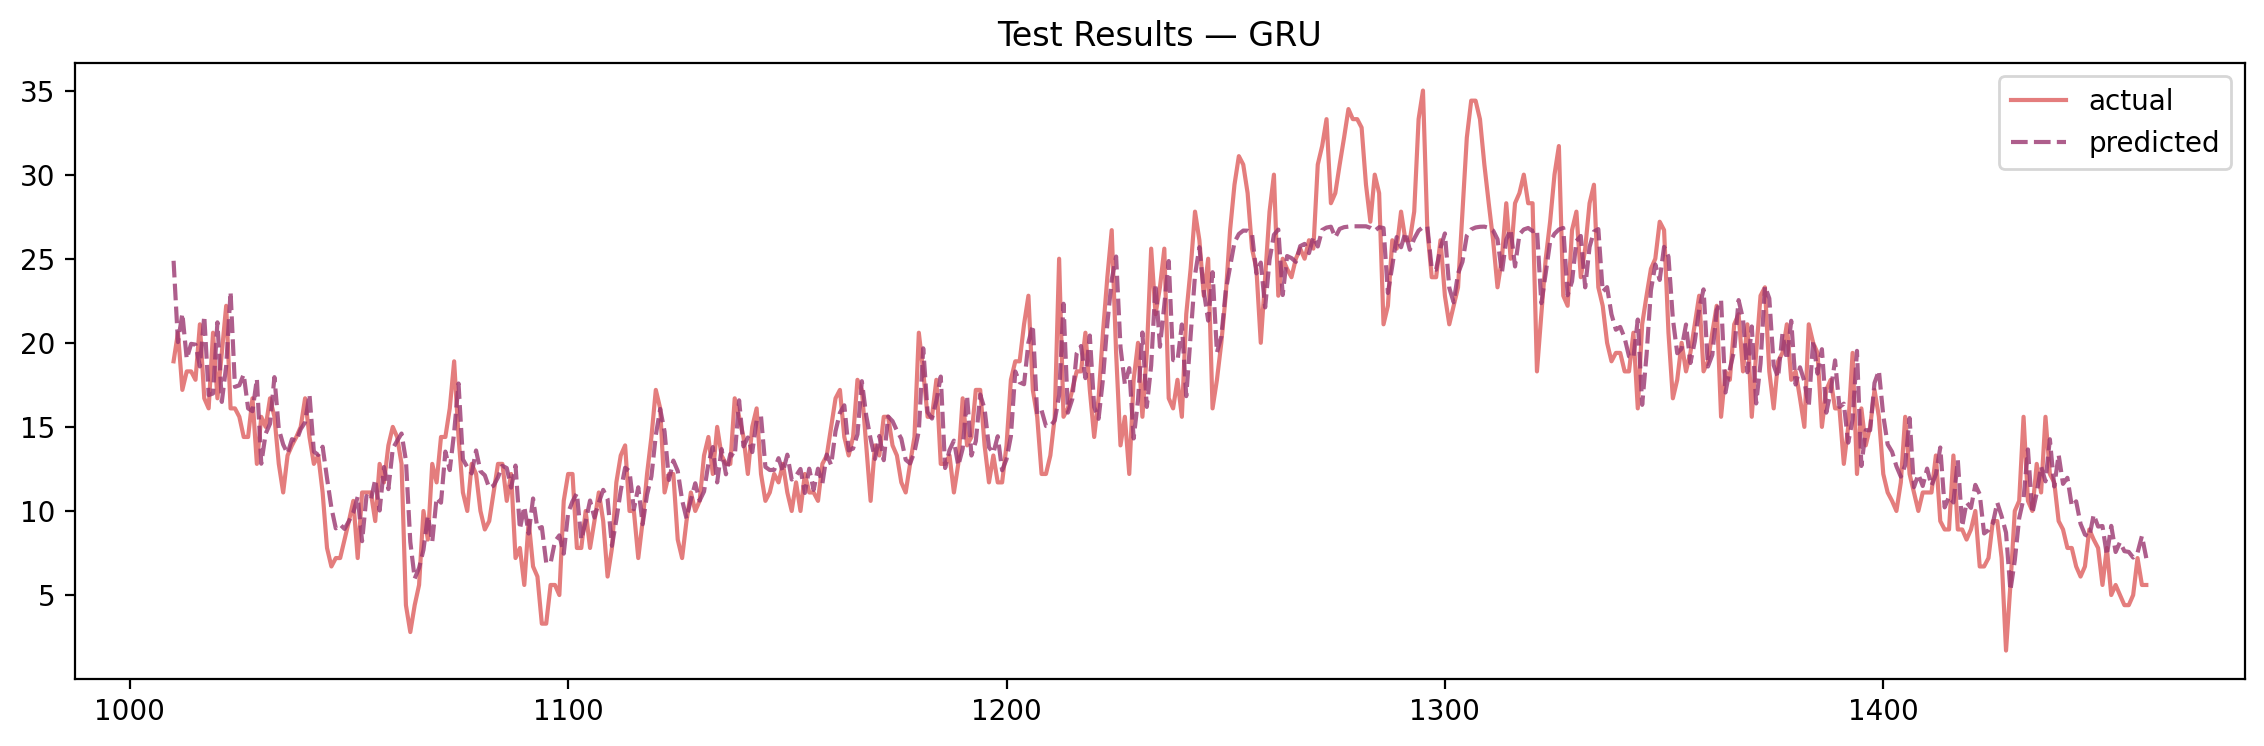

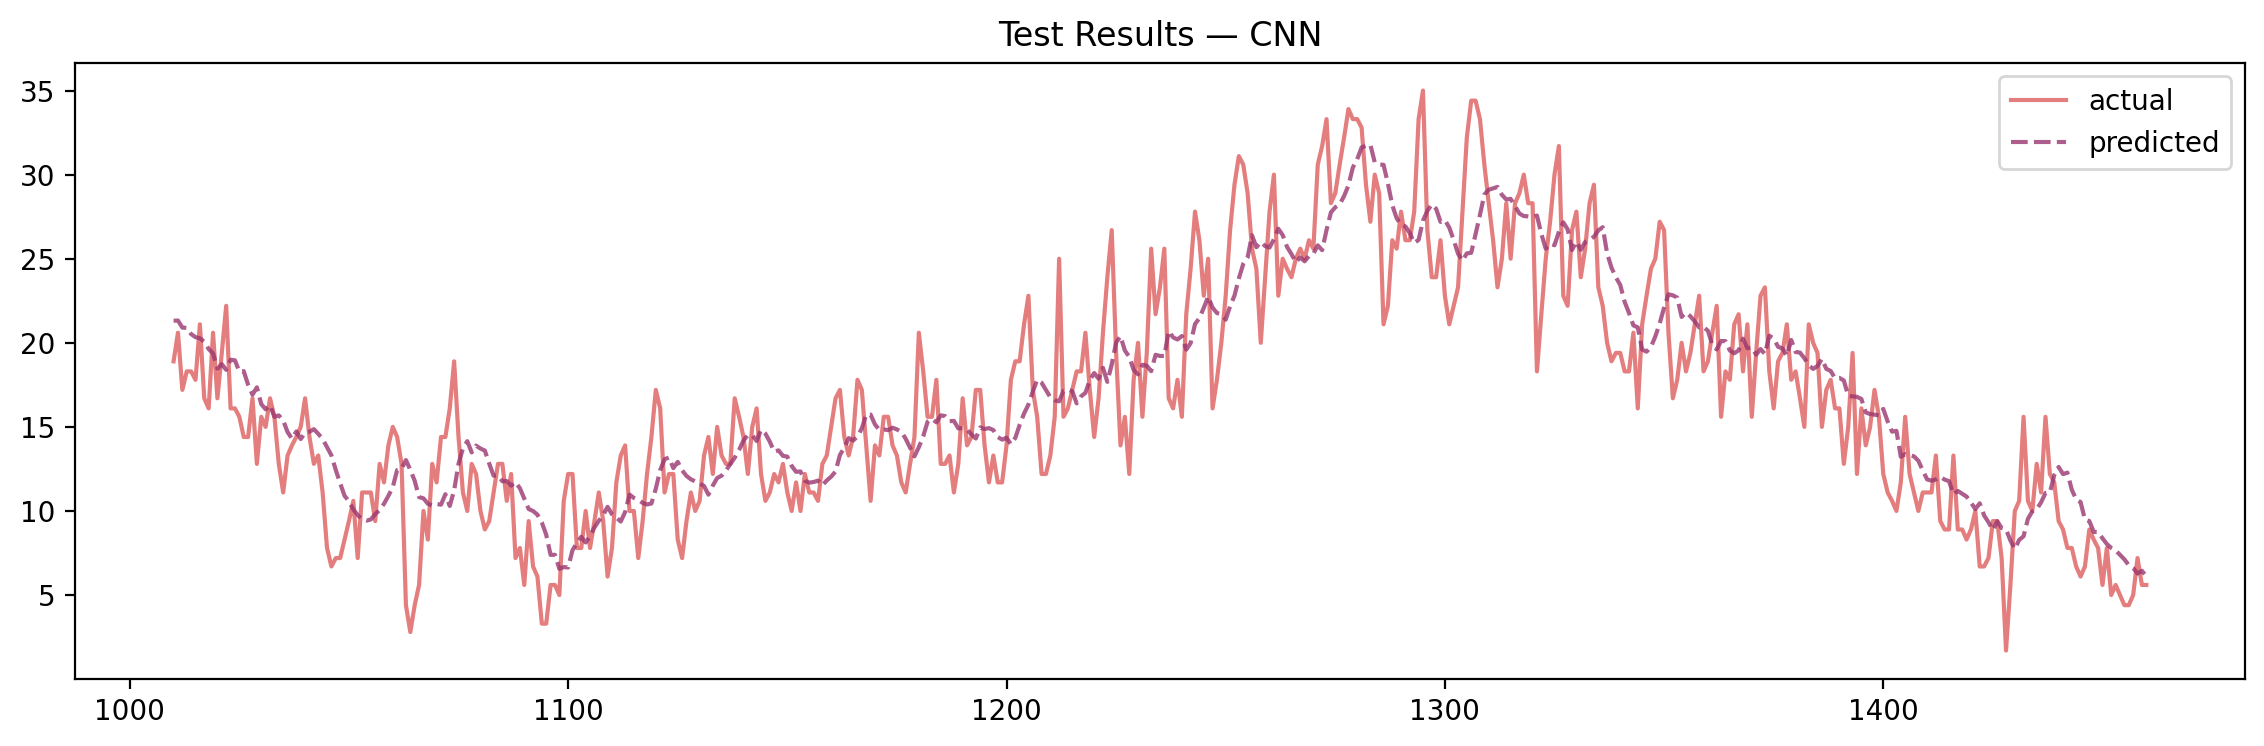

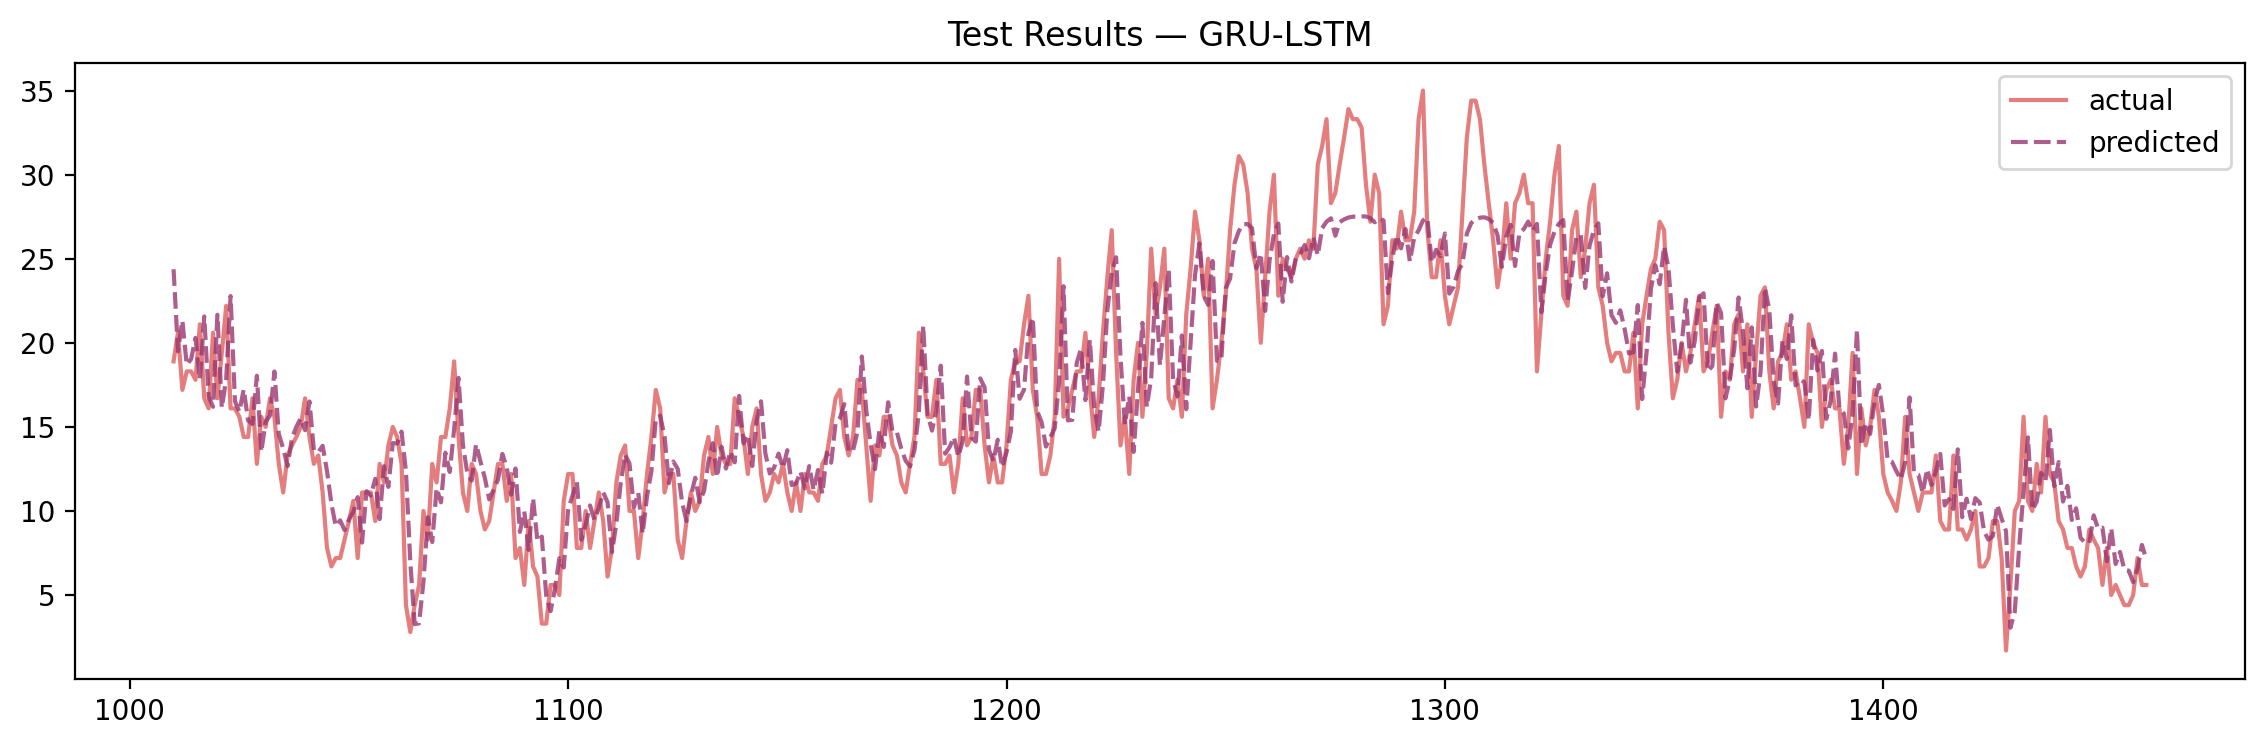

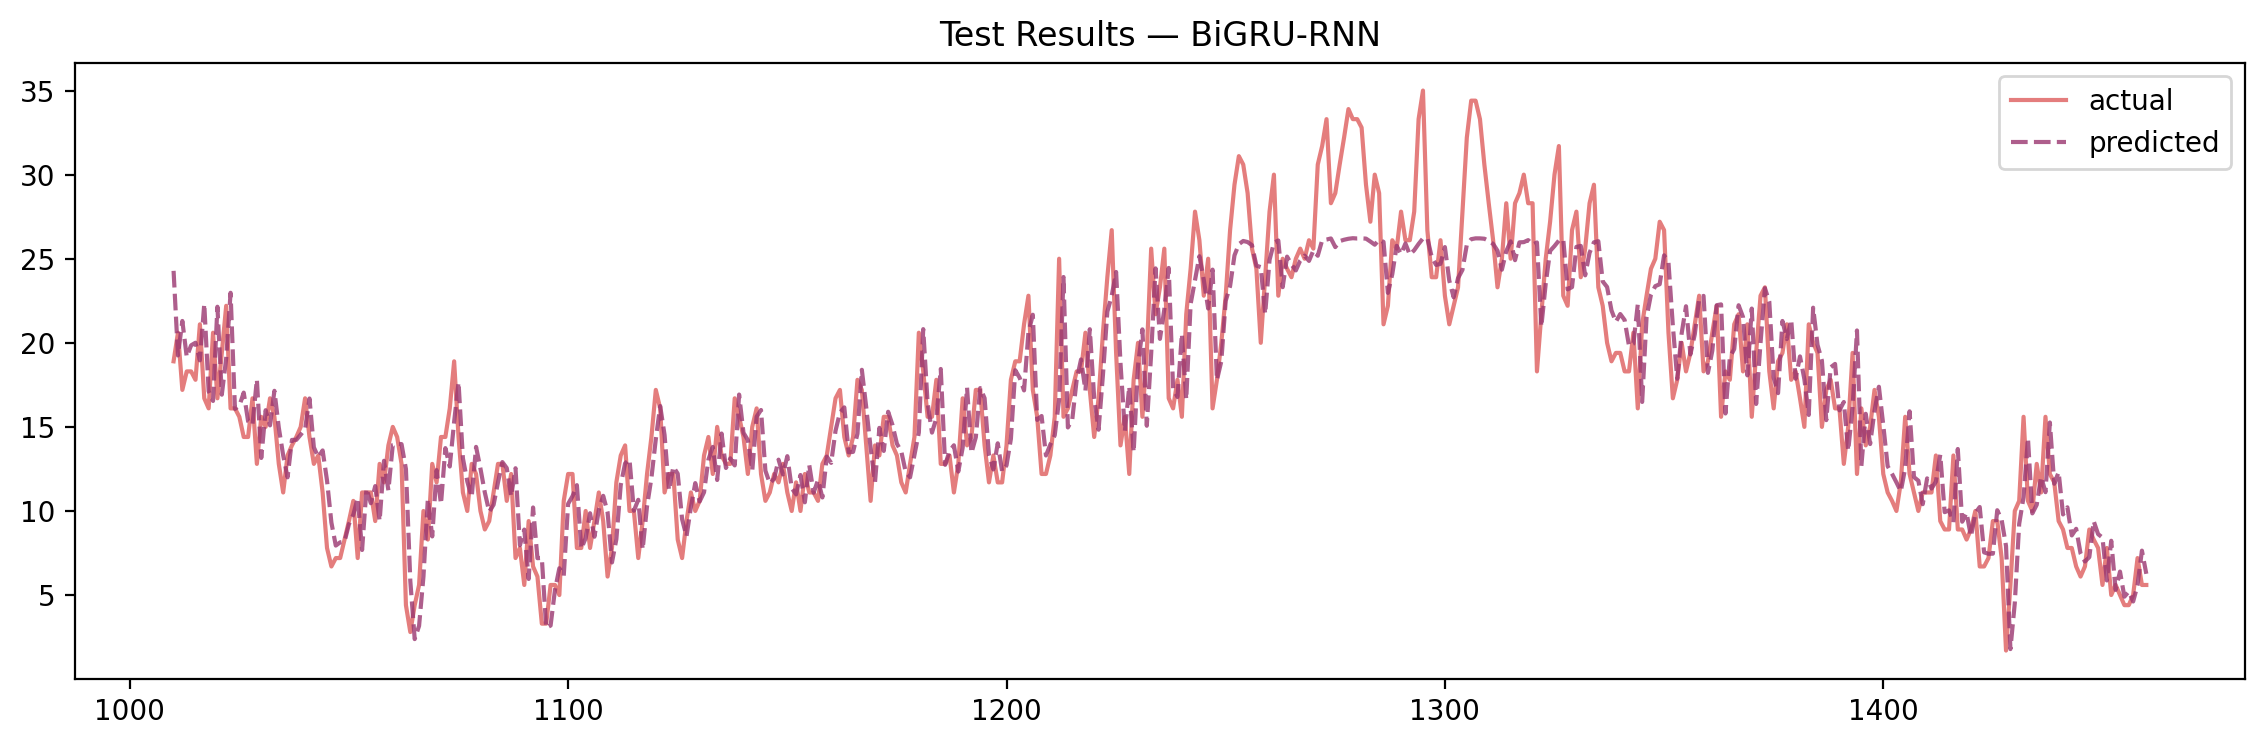

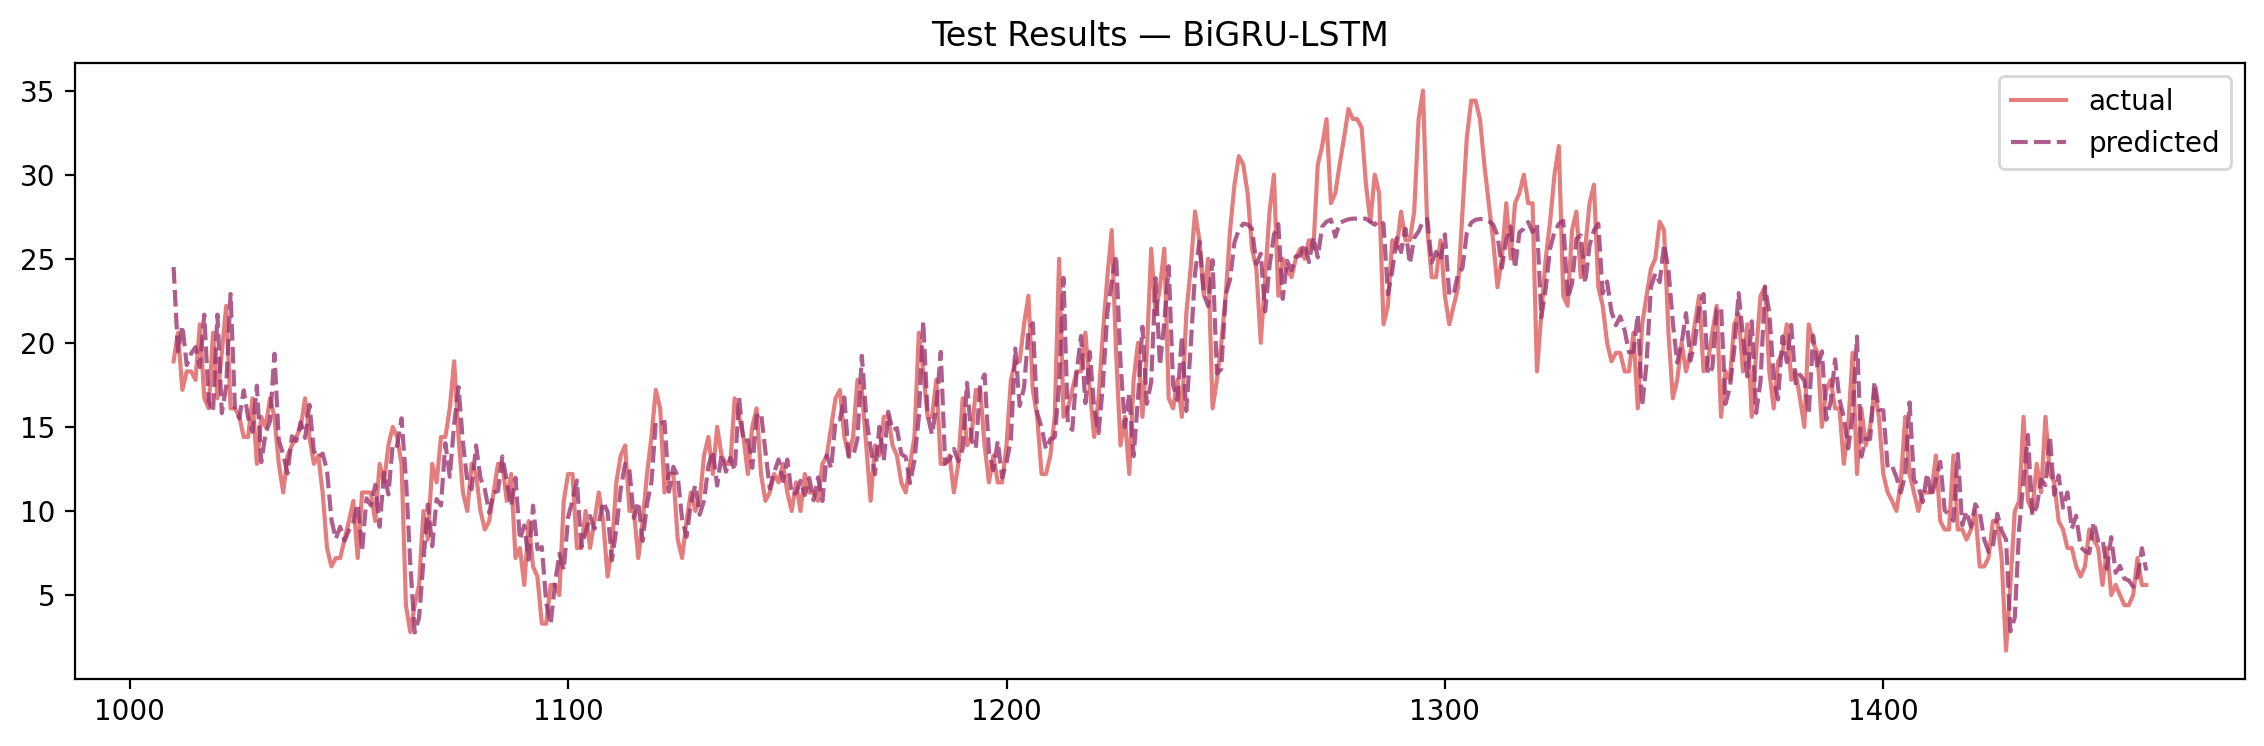

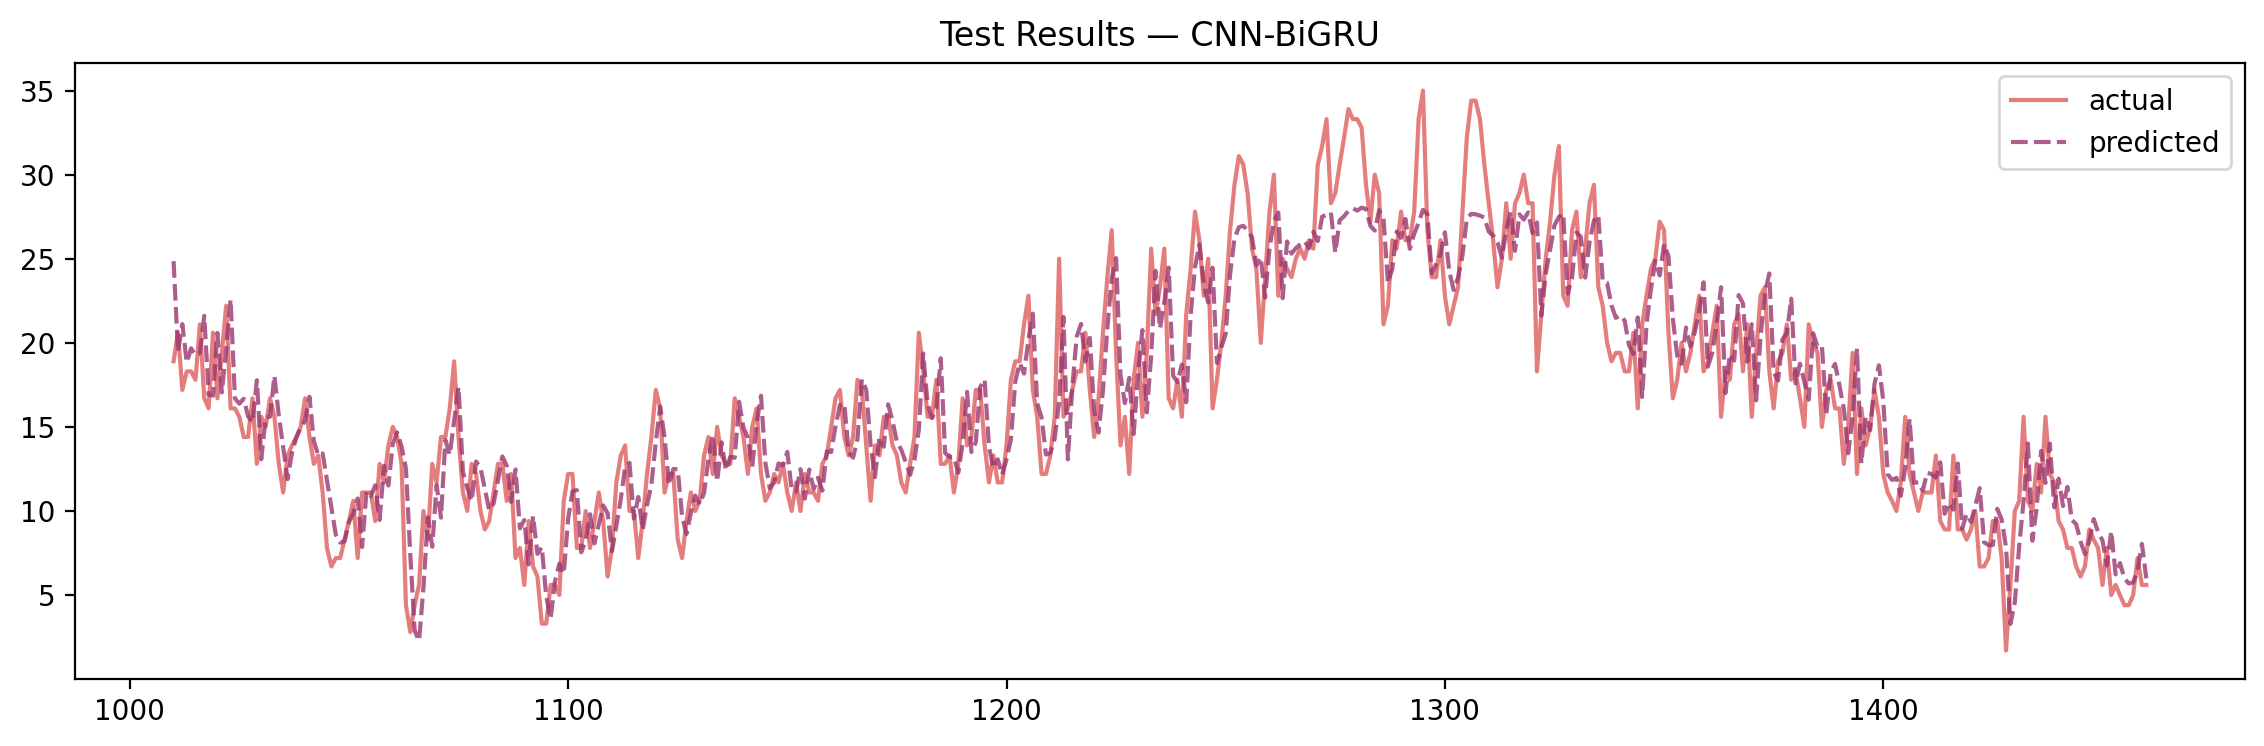

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

uploaded = files.upload()
df = pd.read_csv("seattle-weather.csv")

print(df.head())
print(df.isnull().sum())
print("Total duplicated rows:", df.duplicated().sum())

training_set = df.iloc[:, 2:3].values
print("training_set length:", len(training_set))

def df_to_XY(df_dummy, window_size=10):
    X_train = []
    y_train = []
    for i in range(window_size, len(training_set)):
        X_train.append(training_set[i-window_size:i, 0])
        y_train.append(training_set[i, 0])
    return np.array(X_train), np.array(y_train)

WINDOW = 10
X, y = df_to_XY(df, WINDOW)
print("Total samples:", len(X), len(y))

X_train, y_train = X[:800], y[:800]
X_val, y_val = X[800:1000], y[800:1000]
X_test, x_test = X[1000:], y[1000:]

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU, SimpleRNN, Dropout, Conv1D, GlobalAveragePooling1D, Bidirectional

input_shape = (X_train.shape[1], 1)

def build_vanilla_rnn():
    m = Sequential()
    m.add(SimpleRNN(50, return_sequences=True, input_shape=input_shape))
    m.add(Dropout(0.2))
    m.add(SimpleRNN(50))
    m.add(Dropout(0.2))
    m.add(Dense(1))
    return m

def build_lstm():
    m = Sequential()
    m.add(LSTM(50, return_sequences=True, input_shape=input_shape))
    m.add(Dropout(0.2))
    m.add(LSTM(50, return_sequences=True))
    m.add(Dropout(0.2))
    m.add(LSTM(50, return_sequences=True))
    m.add(Dropout(0.2))
    m.add(LSTM(50))
    m.add(Dropout(0.2))
    m.add(Dense(1))
    return m

def build_gru():
    m = Sequential()
    m.add(GRU(50, return_sequences=True, input_shape=input_shape))
    m.add(Dropout(0.2))
    m.add(GRU(50, return_sequences=True))
    m.add(Dropout(0.2))
    m.add(GRU(50))
    m.add(Dropout(0.2))
    m.add(Dense(1))
    return m

def build_cnn():
    m = Sequential()
    m.add(Conv1D(64, kernel_size=3, padding='causal', activation='relu', input_shape=input_shape))
    m.add(Conv1D(64, kernel_size=3, padding='causal', activation='relu'))
    m.add(GlobalAveragePooling1D())
    m.add(Dropout(0.2))
    m.add(Dense(64, activation='relu'))
    m.add(Dense(1))
    return m

def build_gru_lstm():
    m = Sequential()
    m.add(GRU(64, return_sequences=True, input_shape=input_shape))
    m.add(Dropout(0.2))
    m.add(LSTM(64))
    m.add(Dropout(0.2))
    m.add(Dense(1))
    return m

def build_bigru_rnn():
    m = Sequential()
    m.add(Bidirectional(GRU(64, return_sequences=True), input_shape=input_shape))
    m.add(Dropout(0.2))
    m.add(SimpleRNN(64))
    m.add(Dropout(0.2))
    m.add(Dense(1))
    return m

def build_bigru_lstm():
    m = Sequential()
    m.add(Bidirectional(GRU(64, return_sequences=True), input_shape=input_shape))
    m.add(Dropout(0.2))
    m.add(LSTM(64))
    m.add(Dropout(0.2))
    m.add(Dense(1))
    return m

def build_cnn_bigru():
    m = Sequential()
    m.add(Conv1D(64, 3, padding='causal', activation='relu', input_shape=input_shape))
    m.add(Conv1D(64, 3, padding='causal', activation='relu'))
    m.add(Bidirectional(GRU(64, return_sequences=False)))
    m.add(Dropout(0.2))
    m.add(Dense(1))
    return m

builders = [
    ("VanillaRNN", build_vanilla_rnn),
    ("LSTM",       build_lstm),
    ("GRU",        build_gru),
    ("CNN",        build_cnn),
    ("GRU-LSTM",   build_gru_lstm),
    ("BiGRU-RNN",  build_bigru_rnn),
    ("BiGRU-LSTM", build_bigru_lstm),
    ("CNN-BiGRU",  build_cnn_bigru),
]

from tensorflow.keras.callbacks import EarlyStopping

def metrics_block(y_true, y_pred):
    from sklearn.metrics import mean_squared_error, mean_absolute_error
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae  = mean_absolute_error(y_true, y_pred)
    denom = np.clip(np.abs(y_true), 1e-8, None)
    mape = np.mean(np.abs((y_true - y_pred) / denom)) * 100
    return rmse, mae, mape

all_histories, all_preds, summary_rows = {}, {}, []

for name, fn in builders:
    print(f"\n===== Training {name} =====")
    model = fn()
    model.compile(optimizer='adam', loss='mean_squared_error')
    es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                        epochs=100, batch_size=32, verbose=0, callbacks=[es])
    his = pd.DataFrame(history.history)
    all_histories[name] = his
    train_pred = model.predict(X_train, verbose=0).flatten()
    val_pred   = model.predict(X_val,   verbose=0).flatten()
    test_pred  = model.predict(X_test,  verbose=0).flatten()
    pred = np.concatenate([train_pred, val_pred, test_pred])
    df_pred = pd.DataFrame(df.iloc[:, 2].copy())
    df_pred.columns = ["actual"]
    df_pred = df_pred[WINDOW:].copy()
    df_pred["predicted"] = pred
    all_preds[name] = {"df_pred": df_pred,"train_pred": train_pred,"val_pred": val_pred,"test_pred": test_pred}
    rmse, mae, mape = metrics_block(x_test, test_pred)
    print(f"{name} — Test Metrics")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"MAPE: {mape:.2f}%")
    y_val_true = y[800:1000]
    rmse_v, mae_v, mape_v = metrics_block(y_val_true, val_pred)
    summary_rows.append({"Model": name,"Val RMSE": rmse_v,"Val MAE": mae_v,"Val MAPE (%)": mape_v,
                         "Test RMSE": rmse,"Test MAE": mae,"Test MAPE (%)": mape})

leaderboard = pd.DataFrame(summary_rows).sort_values(by=["Val RMSE","Test RMSE"]).reset_index(drop=True)
print("\n=== Leaderboard ===")
print(leaderboard.to_string(index=False))

best_model_row = leaderboard.iloc[0]
best_model_name = best_model_row["Model"]
print("="*50)
print("\n=== Best Model ===")
print(f"Best model is: {best_model_name}")
print(f"Validation RMSE: {best_model_row['Val RMSE']:.4f}, Test RMSE: {best_model_row['Test RMSE']:.4f}")
print("="*50)

plt.figure(figsize=(14, 8))
plt.title("Loss & Val Loss (All Models)")
for name, his in all_histories.items():
    sns.lineplot(x=range(len(his['loss'])), y=his['loss'], label=f"{name} - loss", alpha=0.7)
    sns.lineplot(x=range(len(his['val_loss'])), y=his['val_loss'], label=f"{name} - val_loss", alpha=0.9, linestyle="--")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()
plt.show()

for name, obj in all_preds.items():
    df_pred = obj["df_pred"]
    plt.figure(figsize=(14, 4), dpi=200)
    plt.title(f"Validation Results — {name}")
    sns.lineplot(data=df_pred.iloc[800:], alpha=0.8, palette="flare", linestyle=None)
    plt.show()

for name, obj in all_preds.items():
    df_pred = obj["df_pred"]
    plt.figure(figsize=(14, 4), dpi=200)
    plt.title(f"Test Results — {name}")
    sns.lineplot(data=df_pred.iloc[1000:], alpha=0.8, palette="flare", linestyle=None)
    plt.show()
